# Predict Basketball Project

In [1]:
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load data

In [3]:
df = pd.read_csv("df_encoded.csv")

## EDA

In [4]:
df.head()

,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SF-SG,Pos_SG,Pos_SG-PG
0,1,Precious Achiuwa,23,TOR,33,9,23.0,4.0,8.2,0.489,...,1.2,2.2,10.4,1,0,0,0,0,0,0
1,2,Steven Adams,29,MEM,42,42,27.0,3.7,6.3,0.597,...,1.9,2.3,8.6,1,0,0,0,0,0,0
2,3,Bam Adebayo,25,MIA,52,52,35.3,8.6,15.7,0.546,...,2.6,2.8,21.6,1,0,0,0,0,0,0
3,4,Ochai Agbaji,22,UTA,35,1,14.0,1.5,3.2,0.486,...,0.3,1.4,4.1,0,0,0,0,0,1,0
4,5,Santi Aldama,22,MEM,52,18,22.0,3.4,7.0,0.486,...,0.7,1.9,9.5,0,1,0,0,0,0,0


In [5]:
df.columns

Index(['Rk', 'Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PG'],
      dtype='object')

### Parametrize the target

In [6]:
target = "PTS"

In [7]:
# df.dtypes

# there are some strings in it

### Choose Predictor variables

In [8]:
df_nums = df.select_dtypes(include=["number"])

In [9]:
df_nums.head()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV,PF,PTS,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SF-SG,Pos_SG,Pos_SG-PG
0,1,23,33,9,23.0,4.0,8.2,0.489,0.5,2.2,...,1.2,2.2,10.4,1,0,0,0,0,0,0
1,2,29,42,42,27.0,3.7,6.3,0.597,0.0,0.0,...,1.9,2.3,8.6,1,0,0,0,0,0,0
2,3,25,52,52,35.3,8.6,15.7,0.546,0.0,0.2,...,2.6,2.8,21.6,1,0,0,0,0,0,0
3,4,22,35,1,14.0,1.5,3.2,0.486,0.7,1.9,...,0.3,1.4,4.1,0,0,0,0,0,1,0
4,5,22,52,18,22.0,3.4,7.0,0.486,1.4,3.7,...,0.7,1.9,9.5,0,1,0,0,0,0,0


In [10]:
df_nums.corr()[target].sort_values(ascending=False)

PTS          1.000000
FG           0.992316
FGA          0.982662
2PA          0.936654
2P           0.918001
FT           0.911350
FTA          0.901151
MP           0.880077
TOV          0.866696
GS           0.759026
AST          0.745556
3PA          0.735407
DRB          0.732581
3P           0.716671
TRB          0.654074
STL          0.640825
PF           0.613166
G            0.551349
FT%          0.419345
BLK          0.363295
ORB          0.317511
3P%          0.242823
eFG%         0.144796
FG%          0.138224
Age          0.121805
2P%          0.119473
Pos_PG       0.071161
Pos_SF-SG    0.003502
Pos_SG      -0.001871
Pos_PF      -0.003541
Pos_SG-PG   -0.012256
Pos_SF      -0.026794
Pos_C       -0.038587
Rk          -0.039788
Name: PTS, dtype: float64

In [11]:
predictor_columns = ["FGA", "2PA", "FTA", "MP", "TOV", "AST", "3PA", "GS", "DRB"]

## Train Test Split

You can either:
- Choose cols and target and then split or....
- Perform split and then choose cols and target

In [12]:
relevant_columns = predictor_columns + [target]
df_relevant = df[relevant_columns]
X = df_relevant[predictor_columns]
y = df_relevant[target]

In [13]:
df_relevant

,FGA,2PA,FTA,MP,TOV,AST,3PA,GS,DRB,PTS
0,8.2,6.0,2.7,23.0,1.2,1.1,2.2,9,4.3,10.4
1,6.3,6.2,3.1,27.0,1.9,2.3,0.0,42,6.5,8.6
2,15.7,15.5,5.5,35.3,2.6,3.3,0.2,52,7.3,21.6
3,3.2,1.3,0.5,14.0,0.3,0.5,1.9,1,1.0,4.1
4,7.0,3.3,1.9,22.0,0.7,1.2,3.7,18,3.7,9.5
...,...,...,...,...,...,...,...,...,...,...
500,5.1,2.8,1.2,22.1,0.8,3.7,2.3,2,2.2,6.0
501,2.4,1.7,0.5,10.2,0.6,1.7,0.6,1,1.1,2.4
502,4.0,3.3,0.6,16.1,0.8,1.5,0.6,9,1.9,5.0
503,19.8,13.2,8.6,35.5,4.2,10.2,6.7,50,2.3,26.9


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Model Fit

In [15]:
X_train

,FGA,2PA,FTA,MP,TOV,AST,3PA,GS,DRB
102,4.0,2.4,0.7,19.9,1.1,2.5,1.5,11,2.8
486,0.0,0.0,0.0,5.0,2.0,0.0,0.0,0,1.0
159,5.4,3.7,1.1,18.1,0.9,2.5,1.7,4,2.4
18,8.0,6.7,2.1,21.3,0.9,0.6,1.3,13,3.8
186,2.9,1.8,1.0,12.4,0.6,0.4,1.0,0,1.1
...,...,...,...,...,...,...,...,...,...
302,18.2,10.8,3.1,35.0,2.6,5.8,7.4,51,3.6
93,7.2,5.5,2.2,20.7,1.9,2.5,1.6,9,3.9
319,11.6,10.4,3.6,34.1,2.0,2.7,1.2,57,6.5
223,1.2,0.3,0.1,4.7,0.1,0.4,0.9,0,0.7


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([ 0.67034525,  0.28675868,  0.96050855,  0.01288916, -0.25503362,
       -0.06704826,  0.376787  ,  0.00759508,  0.20589354])

In [36]:
model.intercept_

-0.27019411654845804

## Model Inference

In [17]:
predictions = model.predict(X_test)

In [18]:
predictions  # Schade Schokolade, es kommen numpy Werte hier raus....

array([ 8.80948033, 26.04436433,  3.7556874 ,  7.3907788 , 11.18982543,
       10.07499494,  6.35928818,  6.46101736,  6.27161227,  9.7898286 ,
       20.914941  ,  6.3281895 , 15.85947001,  3.28892435,  1.52781574,
        6.06848558,  7.92738311, 21.33923726,  4.19367941, 21.46036695,
       12.34009198,  5.29998906, 15.36174999, 10.49817521,  1.8910557 ,
        3.07295869,  1.54734644, 10.48958114, 12.95330283,  8.23587495,
       13.48192646, 13.30717791, 15.85712602,  8.95165515, 20.203545  ,
        5.25812631, 20.52169688, 14.87322099,  8.14470673,  4.08211418,
        6.28755194, 20.15663657,  4.79248454, 18.29057625, 15.44405954,
        9.96402209,  6.52464332,  4.30139089, 13.88833113,  3.04700144,
        0.77703604, 16.47868019,  2.83019217,  8.94513712,  6.1589693 ,
        9.0386286 , 13.52974966,  9.510702  , 13.56339154,  1.11043282,
       10.12800929, 20.27842409,  9.32398241,  4.18388659,  7.43378253,
        9.10901127,  1.9240379 ,  0.73706733,  6.31506314, 14.27

## Calculate Metrics

In [19]:
r2_score(y_true=y_test, y_pred=predictions)

0.981957266945561

### Plot

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

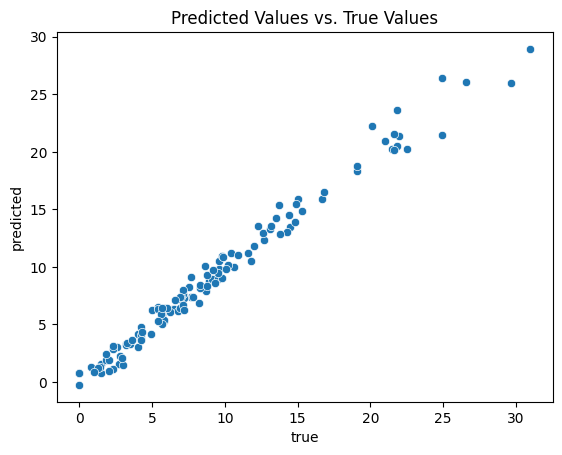

In [21]:
df_to_plot = y_test.to_frame()
df_to_plot["predicted"] = predictions
df_to_plot.columns = ["true", "predicted"]

sns.scatterplot(data=df_to_plot, x="true", y="predicted")
plt.title("Predicted Values vs. True Values")
plt.show()

## Analyse including Player information etc.

Strategy: Use the index!

In [22]:
X_test.index

Index([357,  48, 307, 416, 464,   1, 352, 258, 500, 459,
       ...
       463, 230, 144, 272,  28, 243,  69, 167, 264, 280],
      dtype='int64', length=127)

In [23]:
df_full_information_but_just_test = df.loc[X_test.index]
# Was ist passiert? 
# via.loc[] habe ich gefiltert und zwar auf die Indizees der X_test

In [24]:
df_analysis = df_full_information_but_just_test.copy()

In [25]:
## Side note: f String
my_variable = 42
my_f_string = f"blablabla_{my_variable}"

In [26]:
my_f_string

'blablabla_42'

In [27]:
df_analysis[f"{target}_Predicted"] = predictions

In [28]:
df_analysis.columns

Index(['Rk', 'Player', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Pos_C',
       'Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SF-SG', 'Pos_SG', 'Pos_SG-PG',
       'PTS_Predicted'],
      dtype='object')

In [29]:
# Side Note: 
# Verheiraten von Listen: 
# [1, 2, 3] + [4, 5, 6] --> [1, 2, 3, 4, 5, 6]

In [30]:
what_interests_me = ["Player"] + predictor_columns + [target] + [f"{target}_Predicted"]

In [31]:
df_analysis[what_interests_me]

,Player,FGA,2PA,FTA,MP,TOV,AST,3PA,GS,DRB,PTS,PTS_Predicted
357,Cedi Osman,7.2,3.1,1.5,21.2,0.7,1.6,4.1,0,1.9,8.9,8.809480
48,Devin Booker,20.2,13.8,6.2,34.0,2.5,5.5,6.4,31,3.8,26.6,26.044364
307,JaVale McGee,3.0,2.9,0.9,8.3,0.9,0.3,0.1,7,1.8,4.2,3.755687
416,Shaedon Sharpe,6.5,3.8,0.8,20.1,0.7,0.6,2.7,5,1.7,7.7,7.390779
464,Moritz Wagner,7.6,4.3,3.4,21.3,1.2,1.7,3.2,14,3.4,11.6,11.189825
...,...,...,...,...,...,...,...,...,...,...,...,...
243,Tyus Jones,8.7,4.8,1.3,23.5,1.0,4.6,3.9,9,1.9,10.1,9.855375
69,Reggie Bullock,5.8,0.9,0.6,30.3,0.4,1.4,4.9,33,3.0,6.9,7.361431
167,Jalen Green,17.9,10.2,5.7,34.3,2.9,3.6,7.7,52,3.5,21.8,23.606781
264,Anthony Lamb,5.1,1.8,0.9,19.3,1.0,1.7,3.4,3,2.5,7.2,6.227530
